# Series Temporales

Las series temporales son una serie de eventos ordenados con respecto del **tiempo** y esta en funcion de la misma serie; 
por ejemplo el precio de la bolsa de valores del dia de hoy esta relacionada con su precio del dia de ayer,los enfermos de covid durante unos meses, el creciemiento de la economia, etc.

La serie temporal puede descomponerse en 4 componentes:
   + La media 
   + La estacionalidad  - o ciclo
   + La tendencia
   + El ruido - que es una variable random en nuestros datos 

Podemos usar de la libreria *statsmodels* la funcion *seasonal_decompose* que nos permite plotear su descomposicion

In [3]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot

In [4]:
occupancy = pd.read_csv('data/occupancy.csv')

In [5]:
occupancy

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
1,2/2/2015 15:00,23.718000,26.290000,578.400000,760.400000,0.004773,1
2,2/2/2015 16:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
3,2/2/2015 17:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
4,2/2/2015 18:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
2659,5/24/2015 9:00,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2660,5/24/2015 10:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2661,5/24/2015 11:00,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2662,5/24/2015 12:00,24.356667,25.700000,813.000000,1123.000000,0.004849,1


In [11]:
occupancy['date']=pd.to_datetime(occupancy.date)
occupancy.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,datetime
0,2015-02-02 14:00:00,23.7000,26.272,585.200000,749.200000,0.004764,1,2015-02-02 14:00:00
1,2015-02-02 15:00:00,23.7180,26.290,578.400000,760.400000,0.004773,1,2015-02-02 15:00:00
2,2015-02-02 16:00:00,23.7300,26.230,572.666667,769.666667,0.004765,1,2015-02-02 16:00:00
3,2015-02-02 17:00:00,23.7225,26.125,493.750000,774.750000,0.004744,1,2015-02-02 17:00:00
4,2015-02-02 18:00:00,23.7540,26.200,488.600000,779.000000,0.004767,1,2015-02-02 18:00:00


In [12]:
occupancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 8 columns):
date             2664 non-null datetime64[ns]
Temperature      2664 non-null float64
Humidity         2664 non-null float64
Light            2664 non-null float64
CO2              2664 non-null float64
HumidityRatio    2664 non-null float64
Occupancy        2664 non-null int64
datetime         2664 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(5), int64(1)
memory usage: 166.6 KB


In [13]:
occupancy.set_index('date', inplace = True)

<AxesSubplot:xlabel='date'>

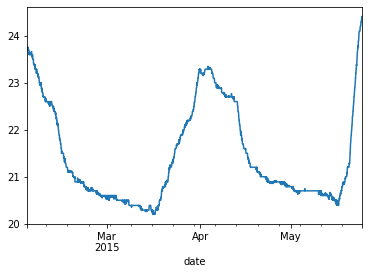

In [16]:
occupancy['Temperature'].plot()

<AxesSubplot:xlabel='date'>

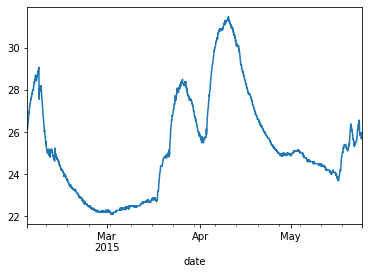

In [17]:
occupancy['Humidity'].plot()

In [20]:
dias = occupancy.loc['2015-4-1':'2015-4-15','Temperature']
dias

date
2015-04-01 00:00:00    23.260
2015-04-01 01:00:00    23.272
2015-04-01 02:00:00    23.245
2015-04-01 03:00:00    23.290
2015-04-01 04:00:00    23.245
                        ...  
2015-04-15 19:00:00    21.600
2015-04-15 20:00:00    21.600
2015-04-15 21:00:00    21.600
2015-04-15 22:00:00    21.600
2015-04-15 23:00:00    21.600
Name: Temperature, Length: 360, dtype: float64

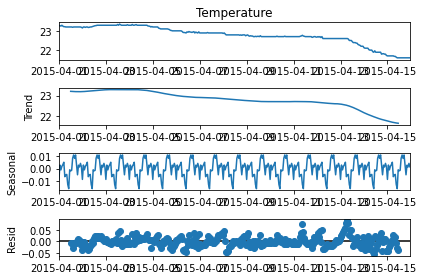

In [21]:
import statsmodels.api as sm

res=sm.tsa.seasonal_decompose(dias)

resplot=res.plot()

### Autoregresión

El modelo usa la relación de dependencia del momento actual con $n$ momentos anteriores. Es, en realidad, una regresión lineal.

$$y_t = \beta_0+\beta_1y_{t-1}+\beta_2y_{t-2}+\ldots+\beta_ny_{t-n}+\epsilon_t$$

Si solamente nos fijamos en el momento anterior, $t-1$, entonces:

$$y_t = \beta_0+\beta_1y_{t-1}+\epsilon_t$$

Es la llamada Cadena de Markov

In [23]:
from pandas.plotting import lag_plot

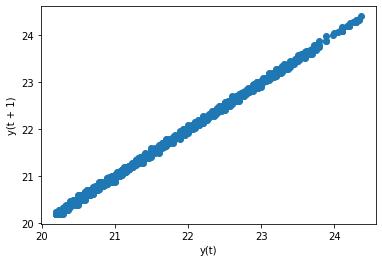

In [25]:
lag_plot(occupancy.Temperature);

In [26]:
from statsmodels.tsa.ar_model import AR

In [30]:
train, test = occupancy.Temperature[:-10],occupancy.Temperature[-10:]

In [33]:
occupancy.drop('datetime', axis = 1, inplace = True)

In [36]:
occupancy.index.isnull().sum()

0

In [37]:
modelo=AR(train).fit()

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, 

In [38]:
pred=modelo.predict(len(train), len(occupancy.Temperature)-1)

error=(pred-test).abs().sum()/len(pred)

error  # error medio absoluto

0.015111852761156896

In [39]:
res=pd.DataFrame({'real':test, 'pred':pred, 'diff':pred-test})
res

,real,pred,diff
2015-05-24 04:00:00,24.200000,24.231775,0.031775
2015-05-24 05:00:00,24.218000,24.244921,0.026921
2015-05-24 06:00:00,24.260000,24.266124,0.006124
2015-05-24 07:00:00,24.290000,24.276668,-0.013332
2015-05-24 08:00:00,24.290000,24.291514,0.001514
2015-05-24 09:00:00,24.290000,24.307918,0.017918
2015-05-24 10:00:00,24.330000,24.321541,-0.008459
2015-05-24 11:00:00,24.330000,24.335426,0.005426
2015-05-24 12:00:00,24.356667,24.355126,-0.001541
2015-05-24 13:00:00,24.408333,24.370226,-0.038108


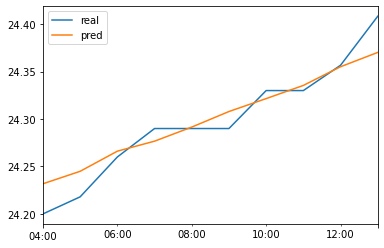

In [42]:
res[['real','pred']].plot();

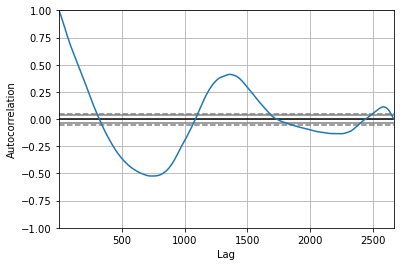

In [45]:
x = pd.plotting.autocorrelation_plot(occupancy.Temperature) 
  
# ploting the Curve 
x.plot() 
  
# Display 
plt.show()

### Media Móvil (Moving Average MA)

Una manera matemática de expresar la MA puede ser:

$$y_t = \beta_0+\epsilon_t+\epsilon_{t-1}\phi_{t-1}+\epsilon_{t-2}\phi_{t-2}+\ldots+\epsilon_{t-n}\phi_{t-n}$$


Se usa la relación entre las observaciones y el error residual de la media móvil.

Otra es la evidente, la media móvil, se muestra en el gráfico.

In [48]:
from statsmodels.tsa.arima_model import ARMA

In [56]:
model = ARMA(occupancy.Temperature, order=(20, 1)) # order son los parametros de ARMA donde el primero es los reazagos a utilizar, 
                                        #y el segundo son las medias moviles a utilizat
model_fit = model.fit(disp=False)#Entrenamos modelo 
predictions = model_fit.predict(len(occupancy.Temperature)-3, len(occupancy.Temperature)-1)

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was p

In [57]:
df_final = pd.DataFrame({'observed':occupancy.Temperature[-3:], 'predicted':predictions})

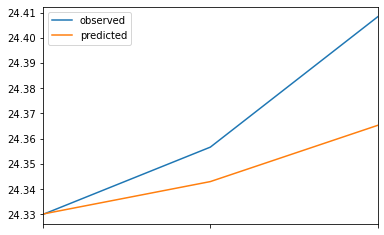

In [76]:
df_final.plot();

In [77]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

In [78]:
data = pd.read_csv('data/AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)

In [79]:
ts = data['#Passengers']

In [80]:
from statsmodels.tsa.stattools import adfuller

In [81]:
dftest = adfuller(ts)

In [82]:
dftest

(0.8153688792060433,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

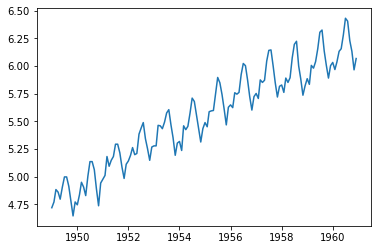

In [83]:
ts_log = np.log(ts)
plt.plot(ts_log)


In [99]:
moving_avg = ts_log.rolling(12).mean()
moving_avg

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
                ...   
1960-08-01    6.124517
1960-09-01    6.132246
1960-10-01    6.142628
1960-11-01    6.148837
1960-12-01    6.154215
Name: #Passengers, Length: 144, dtype: float64

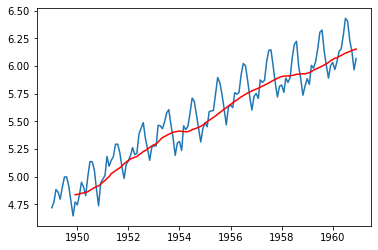

In [100]:

plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [101]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

In [107]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling( window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

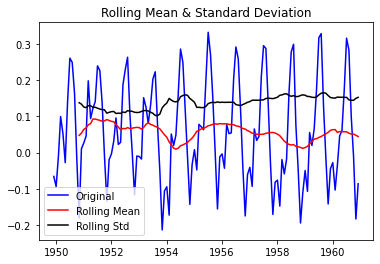

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [108]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

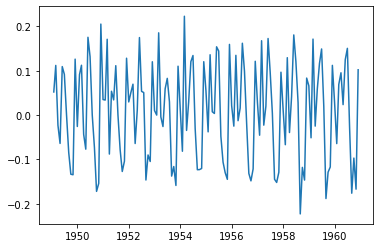

In [109]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

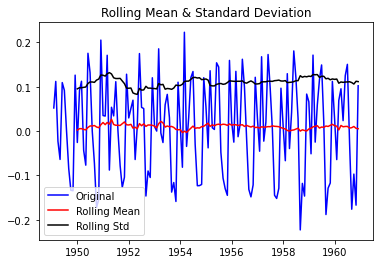

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [110]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [111]:
ts_log

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: #Passengers, Length: 144, dtype: float64

In [112]:
from statsmodels.tsa.arima_model import ARIMA

In [114]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was p

Text(0.5, 1.0, 'RSS: 1.0292')

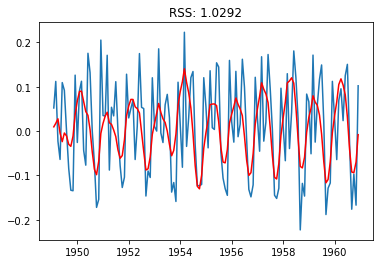

In [115]:
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [117]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [118]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [119]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

Text(0.5, 1.0, 'RMSE: 90.1047')

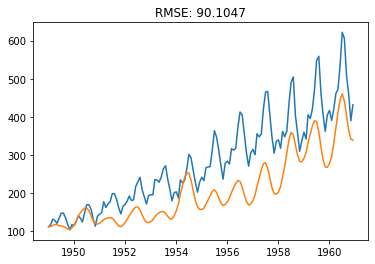

In [120]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))